# First exploration of unattended TG ApRES data. 

In [5]:
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [6]:
%load_ext autoreload
%autoreload 2 
import hvplot.xarray
import sys
sys.path.append("/Users/jkingslake/Documents/science/ApRES/xapres")
import xapres as xa
import matplotlib.pyplot as plt
import xarray as xr
#from datatree import DataTree


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load from the google bukcet and save a subset of the data to local disk
The next two cells can be missed out if running on local machine where you've saved 'zarrs/LTG_stacked.zarr' etc.

In [3]:
LTG = xr.open_dataset('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_LTG/zarr/full.zarr',
                      engine = 'zarr',
                      chunks = {})
LK1 = xr.open_dataset('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_Lake1/zarr/full.zarr',
                      engine = 'zarr',
                      chunks = {})
LK2 = xr.open_dataset('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_Lake2/zarr/full.zarr',
                      engine = 'zarr',
                      chunks = {})
ds_list = [LTG, LK1, LK2]
dt = xr.DataTree.from_dict({"LTG": ds_list[0], "LK1": ds_list[1], "LK2": ds_list[2]})
dt = dt.drop_vars(['chirp', 'profile'])

AttributeError: module 'xarray' has no attribute 'DataTree'

In [4]:
#LTG.drop_vars(['chirp', 'profile']).to_zarr('zarrs/LTG_stacked.zarr')
#LK1.drop_vars(['chirp', 'profile']).to_zarr('zarrs/LK1_stacked.zarr')
#LK2.drop_vars(['chirp', 'profile']).to_zarr('zarrs/LK2_stacked.zarr')

In [7]:
def load_zarr(f):
    return xr.open_dataset(f, engine = 'zarr', chunks = {})
LTG = load_zarr('zarrs/LTG_stacked.zarr').load()
LK1 = load_zarr('zarrs/LK1_stacked.zarr').load()
LK2 = load_zarr('zarrs/LK2_stacked.zarr').load()
dLTG = LTG.profile_stacked.displacement_timeseries().compute()
dLK1 = LK1.profile_stacked.displacement_timeseries().compute()
dLK2 = LK2.profile_stacked.displacement_timeseries().compute()

## Plotting

In [ ]:
LTG.profile_stacked.dB().squeeze().hvplot(x='time', y = 'profile_range', height = 700, width = 1300, yincrease = False)

In [ ]:
LK1.profile_stacked.dB().squeeze().hvplot(x='time', y = 'profile_range', height = 700, width = 1300, yincrease = False)

In [ ]:
LK2.profile_stacked.dB().squeeze().hvplot(x='time', y = 'profile_range', height = 700, width = 1300, yincrease = False)

In [ ]:
LTG.profile_stacked.dB().squeeze().hvplot(x='profile_range', y= 'profile_stacked').show()


In [ ]:
LK1.profile_stacked.dB().squeeze().hvplot(x='profile_range', y= 'profile_stacked')

In [ ]:
LK2.profile_stacked.dB().squeeze().hvplot(x='profile_range', y= 'profile_stacked')

In [ ]:
dLTG.displacement.squeeze().plot(x='time', yincrease = False, figsize = (20,10))
plt.title('LTG shot-to-shot (~daily) displacement');

In [ ]:
dLK1.displacement.squeeze().plot(x='time', yincrease = False, figsize = (20,10))
plt.title('LK1 shot-to-shot (~daily) displacement');

In [ ]:
dLK2.displacement.squeeze().plot(x='time', yincrease = False, figsize = (20,10))
plt.title('LK2 shot-to-shot (~daily) displacement');

In [ ]:
dLTG.displacement.cumsum(dim='time').squeeze().plot(x='time', yincrease = False, figsize = (20,10))
plt.title('LTG cumulative displacement');

In [ ]:
dLK1.displacement.cumsum(dim='time').squeeze().plot(x='time', yincrease = False, figsize = (20,10))
plt.title('LK1 cumulative displacement');

In [ ]:
dLK2.displacement.cumsum(dim='time').squeeze().plot(y='bin_depth', x='time', yincrease = False, figsize = (20,10))
plt.title('LK2 cumulative displacement');

In [ ]:
dLTG.displacement.squeeze().hvplot(x='displacement', y = 'bin_depth', xlim = (-0.06, 0.06), ylim = (1200, 0))

In [ ]:
dLK1.displacement.squeeze().hvplot(x='displacement', y = 'bin_depth', xlim = (-0.06, 0.06), ylim = (2200, 0))


In [ ]:
dLK2.displacement.squeeze().hvplot(x='displacement', y = 'bin_depth', xlim = (-0.06, 0.06), ylim = (2000, 0))


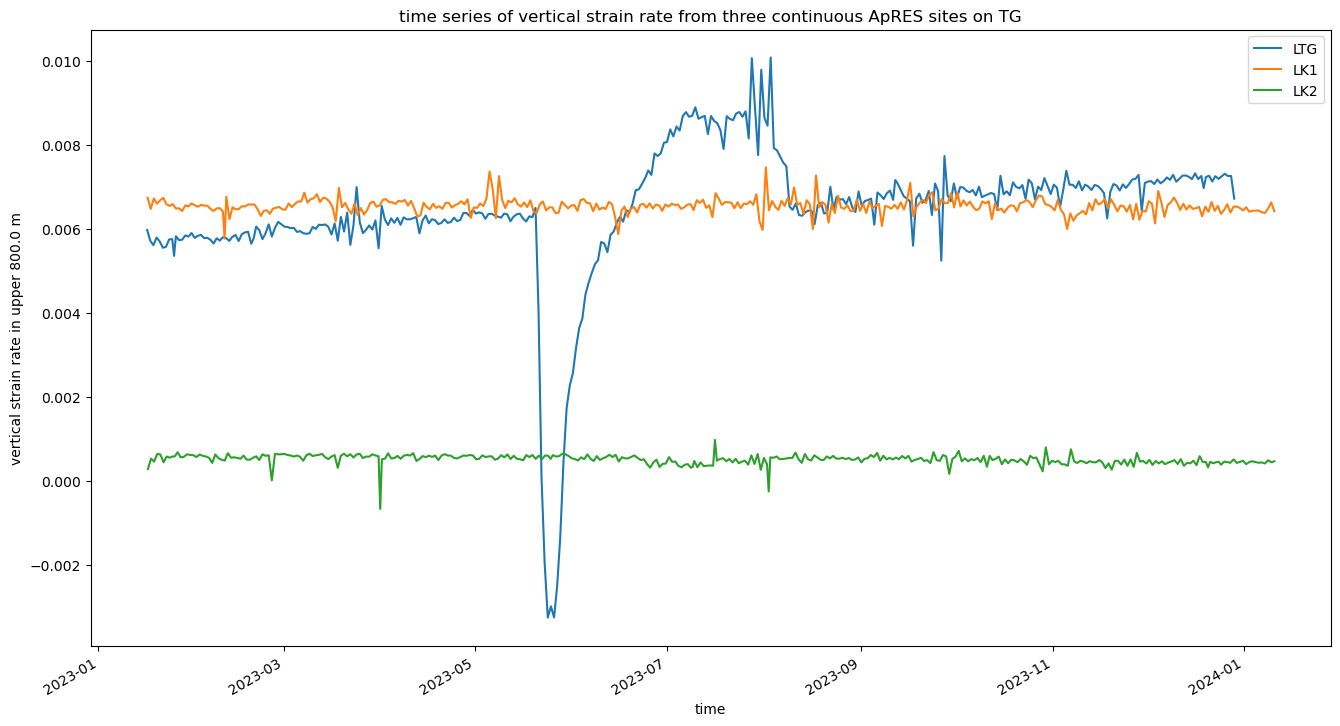

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
dLTG.strain_rate.plot(ax=ax, label = 'LTG')
dLK1.strain_rate.plot(ax=ax, label = 'LK1')
dLK2.strain_rate.plot(ax=ax, label = 'LK2')
ax.set_title('time series of vertical strain rate from three continuous ApRES sites on TG')
ax.set_ylabel(dLTG.strain_rate.attrs['long_name'])
ax.legend();